In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
#Loading dataset
df = pd.read_csv("amz_uk_price_prediction_dataset.csv")

## Initial Exploration

In [3]:
df.head(3)

,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
0,1,B09B96TG33,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
1,2,B01HTH3C8S,"Anker Soundcore mini, Super-Portable Bluetooth...",4.7,98099,23.99,True,0,Hi-Fi Speakers
2,3,B09B8YWXDF,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers


In [4]:
df.shape

(2443651, 9)

In [5]:
df.dtypes

uid                    int64
asin                  object
title                 object
stars                float64
reviews                int64
price                float64
isBestSeller            bool
boughtInLastMonth      int64
category              object
dtype: object

## Part 1: Understanding Product Categories

In [6]:
#1. Frequency Tables
frequency_table = df['category'].value_counts(dropna='False')
display(frequency_table)

category
Sports & Outdoors                         836265
Beauty                                     19312
Handmade Clothing, Shoes & Accessories     19229
Bath & Body                                19092
Birthday Gifts                             18978
                                           ...  
Alexa Built-In Devices                       107
Motorbike Chassis                            107
Plugs                                        107
Smart Home Security & Lighting               104
Smart Speakers                                54
Name: count, Length: 296, dtype: int64

The top 5 most listed category are :
* Sports & Outdoors
* Beauty
* Handmade Clothing, Shoes & Accessories
* Bath & Body 
* Birthday Gifts

In [7]:
len(frequency_table.index[0:5])

5

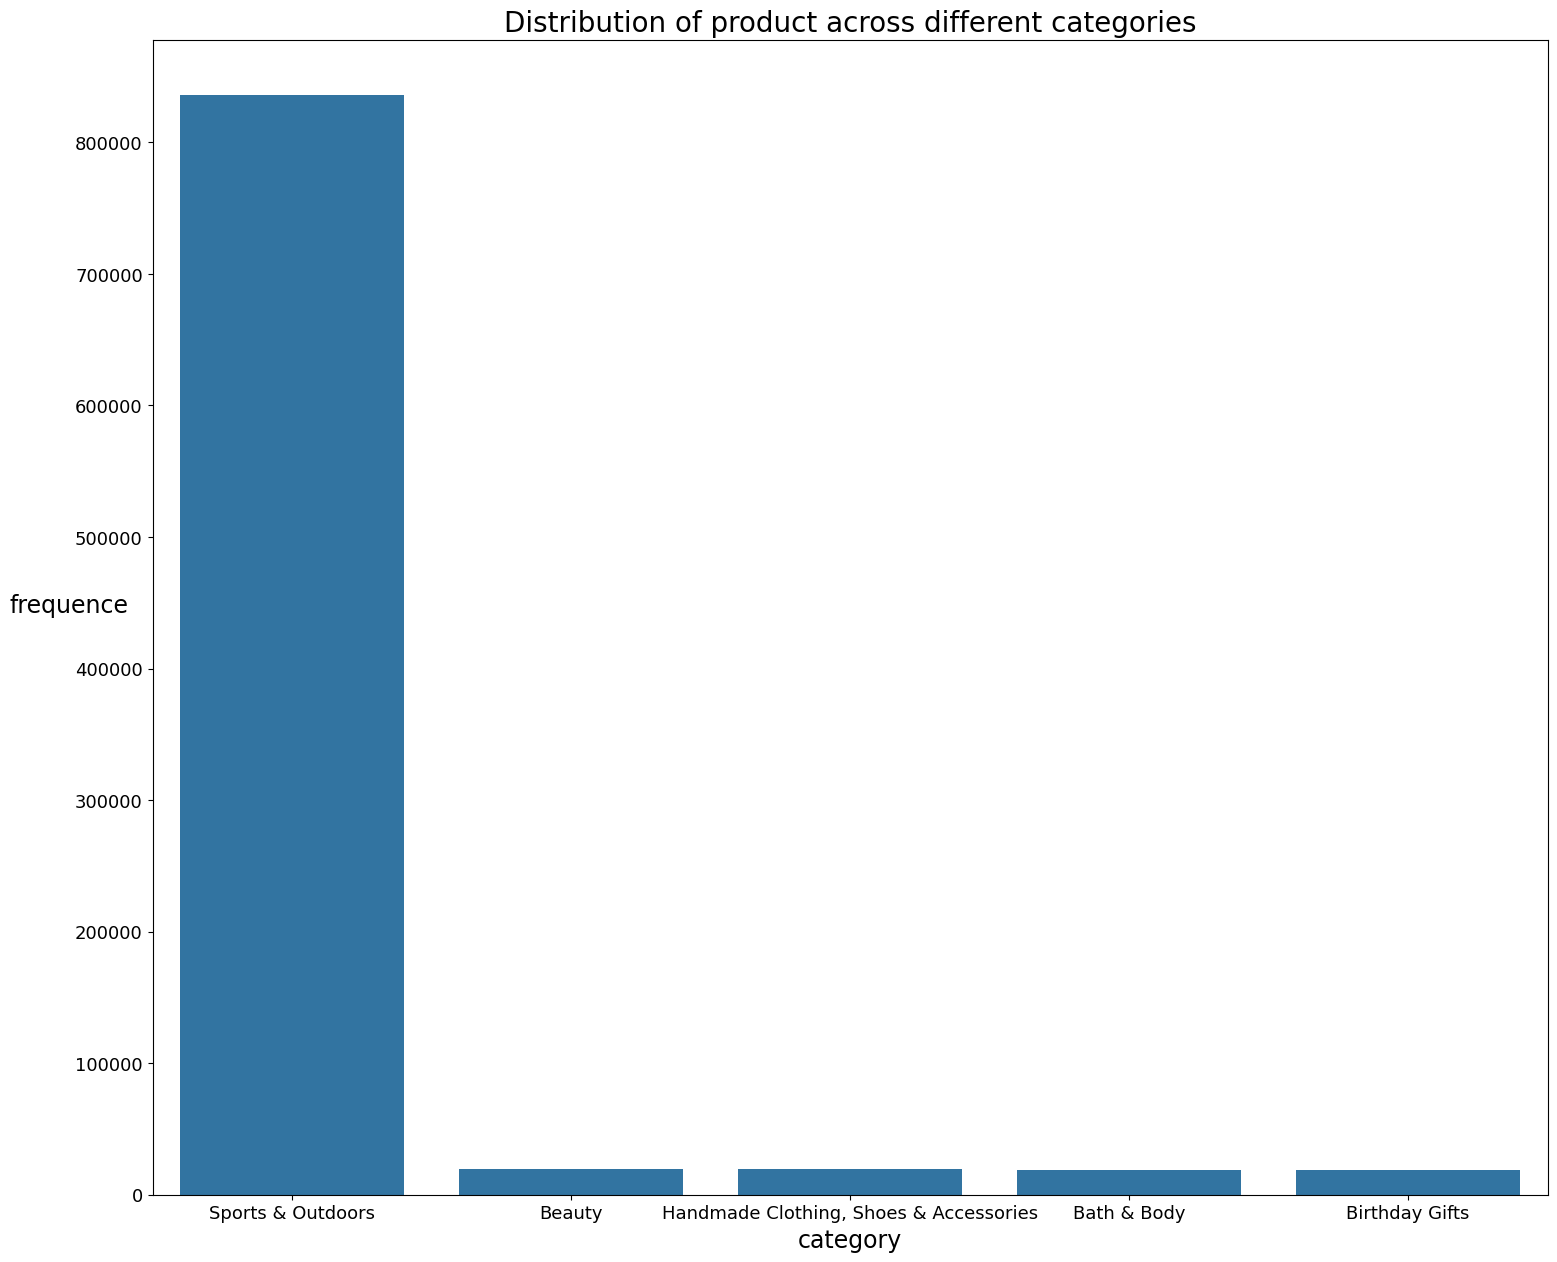

'\n# Correction Histogram for product ratings\nplt.figure(figsize=(10, 6))\nsns.histplot(data = df[\'stars\'], bins=20, kde=True, color="skyblue")\nplt.title(\'Distribution of Product Ratings\')\nplt.show()\n'

In [46]:
#2. Visualizations
#Plotting a bar chart
'''
Keep the labels horizontals and rename if too long
'''
plt.figure(figsize=(18, 15))
ax = sns.barplot(x=frequency_table.index[0:5], y=frequency_table.values[0:5])
ax.axes.set_title("Distribution of product across different categories",fontsize=20)
ax.set_xlabel("category",fontsize=17)
ax.set_ylabel("frequence",rotation = 360, fontsize=17)
ax.tick_params(labelsize=13)
#plt.xticks(rotation=75)
plt.show() 

'''
# Correction Histogram for product ratings
plt.figure(figsize=(10, 6))
sns.histplot(data = df['stars'], bins=20, kde=True, color="skyblue")
plt.title('Distribution of Product Ratings')
plt.show()
'''

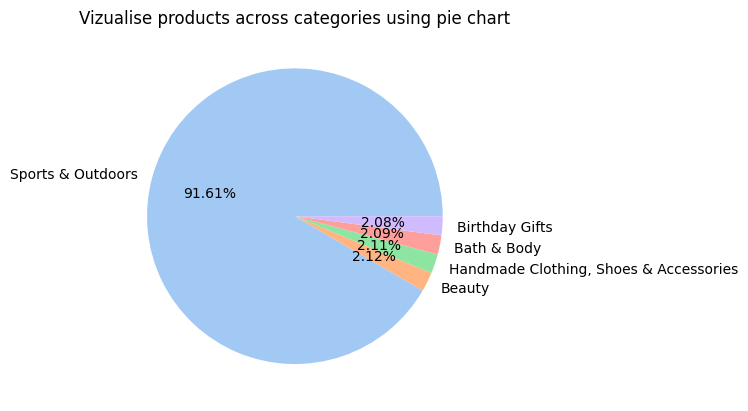

In [9]:
#Plotting a pie chart
colors = sns.color_palette('pastel')[0:5]
plt.pie(frequency_table.values[0:5], labels = frequency_table.index[0:5], colors = colors, autopct='%1.2f%%')
plt.title("Vizualise products across categories using pie chart")
plt.show()


## Part 2: Delving into Product Pricing

In [10]:
#1. Measures of Centrality

#mean, median, mode
mean = df['price'].mean()
median = df['price'].median()
mode = df['price'].mode()[0]

display(mean, median, mode)

#What's the average price point of products listed?
#How does this compare with the most common price point (mode)?

'''
The average price point pf product listed is 89.24
The mean is greater than the mode which is 9.99 this means that 
the distribution is positively skewed.
'''

89.24380943923663

19.09

9.99

'\nThe average price point pf product listed is 89.24\nThe mean is greater than the mode which is 9.99 this means that \nthe distribution is positively skewed.\n'

In [11]:
#2. Measures of Dispersion

variance_price = df['price'].var()
std_dev_price = df['price'].std()
min_price = df['price'].min()
max_price = df['price'].max()
range_price = max_price - min_price
quantiles_price = df['price'].quantile([0.25, 0.5, 0.75])

display(variance_price, std_dev_price, min_price, max_price, range_price, quantiles_price)

#How varied are the product prices? 
#Are there any indicators of a significant spread in prices?
'''
The product prices varies a lot, the standard deviation is really high
so there is a significatn spread in prices
'''

119445.48532254907

345.60886175349884

0.0

100000.0

100000.0

0.25     9.99
0.50    19.09
0.75    45.99
Name: price, dtype: float64

'\nThe product prices varies a lot, the standard deviation is really high\nso there is a significatn spread in prices\n'

<Axes: ylabel='Frequency'>

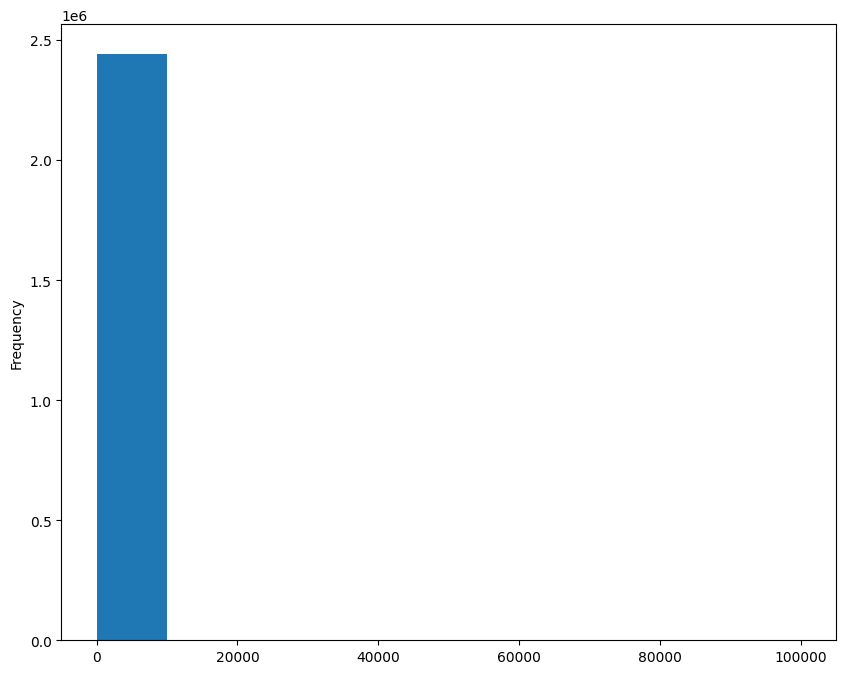

In [28]:
#3. Vizualisations

df['price'].plot(kind='hist', figsize=(10, 8))

<Axes: xlabel='price'>

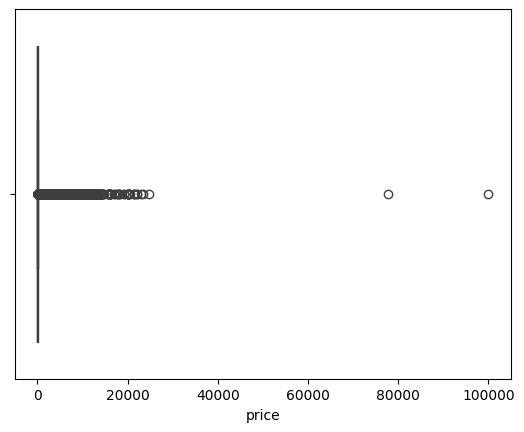

In [25]:
sns.boxplot(x=df['price'])

In [ ]:
'''
Try again with boxplot, bins = [10, 100, 1000, 10000, 100000]
'''

bins = [0, 10, 100, 1000, 10000, df['price'].max()]
labels = ['Very Low', 'Low', 'Medium', 'High', 'Very High']
df['sale_price_category'] = pd.cut(df['price'], bins=bins, labels=labels, include_lowest=True)
sns.histplot(df['sale_price_category'], kde=True, color="blue", bins=5)

'''
bins = [0, 10, 100, 1000, 10000, df['price'].max()]
labels = ['0-10', '11-100', '101-1000', '1001-10000', '10001 - 100000']
df['price_category'] = pd.cut(df['price'], bins=bins, labels=labels, include_lowest=True)
'''

In [18]:
'''
very high positive skew means high right skew
very high negative skew means high left skew
if skew close to 0 then more symetric gaus
higher skewed data means the data is not evenly distributed
'''
df['price'].skew()

27.492977566280338

In [15]:
#df['price_quantile'] = pd.qcut(df['price'], q=4)
#df['price_quantile'].value_counts()
#pd.DataFrame({'price': np.random.normal(mean, std_dev_price, max_price)})
df['price_quantile'] = np.random.normal(df['price'])
df['price_quantile'].value_counts()
sns.histplot(data=df, x='price_quantile')

price_quantile
22.390985     1
59.070414     1
76.831039     1
84.669840     1
162.097439    1
             ..
8.225360      1
12.288333     1
476.913463    1
1.848388      1
54.664782     1
Name: count, Length: 2443651, dtype: int64

## Part 3: Unpacking Product Ratings